#***Guided Project: Predicting Listing Gains in the Indian IPO Market Using TensorFlow***



##**Project Overview:**


*   In this project, I leverage TensorFlow's deep learning capabilities to forecast listing gains for Indian IPOs. Acting as a Data Scientist for an investment firm, I aim to assess if an IPO (**Initial Public Offerings**) will see a positive price movement on its listing day compared to the issue price.



##**Objective:**


*   This project aims to develop a deep learning-based classification model to predict IPO listing gains in the Indian market using key factors like issue size, subscription rates across investor segments, issue price, and other relevant features.




##**Data Dictionary**

**The data consists of following columns:**


*   **Date:** date when the IPO was listed

*  **IPOName:** name of the IPO

*   **Issue_Size:** size of the IPO issue, in INR Crores

*   **Subscription_QIB:** number of times the IPO was subscribed by the QIB (Qualified Institutional Buyer) investor category

*   **Subscription_HNI:** number of times the IPO was subscribed by the HNI (High Networth Individual) investor category
*   **Subscription_RII:** number of times the IPO was subscribed by the RII (Retail Individual Investors) investor category


*   **Subscription_Total:** total number of times the IPO was subscribed overall


*   **Issue_Price:** the price in INR at which the IPO was issued


*   **Listing_Gains_Percent:** is the percentage gain in the listing price over the issue price



In [19]:
#importing necessary libraries

import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import warnings

warnings.filterwarnings('ignore')

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras import regularizers


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Indian_IPO_Market_Data.csv')
df.head()

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20


In [3]:
df.tail()

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
314,26/08/22,Syrma SGS,840.13,42.42,7.13,2.84,15.59,220,42.30
315,06/09/22,Dreamfolks Serv,562.10,27.48,14.18,24.19,23.25,326,41.92
316,15/09/22,TMB,792.00,0.51,1.77,3.44,1.39,525,-3.15
317,26/09/22,Harsha Engineer,755.00,113.82,40.36,12.44,47.19,330,47.24
318,17/10/22,Electronics Mar,500.00,58.81,15.39,8.27,24.23,59,43.14


##**Exploratory Data Analysis (EDA)**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   319 non-null    object 
 1   IPOName                319 non-null    object 
 2   Issue_Size             319 non-null    float64
 3   Subscription_QIB       319 non-null    float64
 4   Subscription_HNI       319 non-null    float64
 5   Subscription_RII       319 non-null    float64
 6   Subscription_Total     319 non-null    float64
 7   Issue_Price            319 non-null    int64  
 8   Listing_Gains_Percent  319 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 22.6+ KB


The dataset contains 2 object-type, 6 float-type, and 1 integer-type columns. We'll convert the **'date'** column to datetime format since it shouldn't remain as an object. Additionally, we'll remove the **'IPOName'** column as it doesn't contribute to prediction accuracy.

In [5]:
# Print the summary statistics for the 'Listing_Gains_Percent' variable in the dataset
df['Listing_Gains_Percent'].describe()

,Listing_Gains_Percent
count,319.000000
mean,4.742696
std,47.650946
min,-97.150000
25%,-11.555000
50%,1.810000
75%,25.310000
max,270.400000


As we can see here that the mean value for **Listing_Gains_Percent** is 4.74% and the min and max values are -97.15% and 270.40% respectively. Also a standard deviation of 47.65%, indicating a wide range of listing gains. As 75% of data are below 26%, so there is a high chance that we have outliers on this data.

In [6]:
# Print the summary statistics for all variables of the dataset
df.describe()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696
std,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,47.650946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000
25%,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000
50%,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000
75%,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000
max,21000.000000,215.450000,958.070000,119.440000,326.490000,2150.000000,270.400000


**Listing_Gains_Percent** target variable is continous. Therfore, we will need to convert it into a categorical variable before we can proceed.

In [7]:
# Create a categorical target variable, Listing_Gains_Profit

df['Listing_Gains_Profit'] = df['Listing_Gains_Percent'].apply(lambda x: 1 if x > 0 else 0)
df['Listing_Gains_Profit'].unique()

array([1, 0])

We successfully created a new categorical target variable, 'Listing_Gains_Profit', which indicates whether an IPO listed at a profit(1) or not(0) based on the 'Listing_Gains_Percent'.

In [8]:
#missing values check
df.isnull().sum()

,0
Date,0
IPOName,0
Issue_Size,0
Subscription_QIB,0
Subscription_HNI,0
Subscription_RII,0
Subscription_Total,0
Issue_Price,0
Listing_Gains_Percent,0
Listing_Gains_Profit,0


We have no missing values here


In [9]:
# checking summary statistics
df.describe()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent,Listing_Gains_Profit
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696,0.545455
std,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,47.650946,0.498712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000,0.000000
25%,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000,0.000000
50%,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000,1.000000
75%,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000,1.000000
max,21000.000000,215.450000,958.070000,119.440000,326.490000,2150.000000,270.400000,1.000000


In [10]:
# Calculate the percentage of IPOs listed at a profit
profit_percentage = (df['Listing_Gains_Profit'] == 1).mean() * 100
print(f"Percentage of IPOs listed at a profit: {profit_percentage:.2f}%")

Percentage of IPOs listed at a profit: 54.55%


Approximately 54.55% of the IPOs listed at a profit based on the provided dataset.

##**Data Visualization:**

**Visualization 1: Distribution of the target variable**

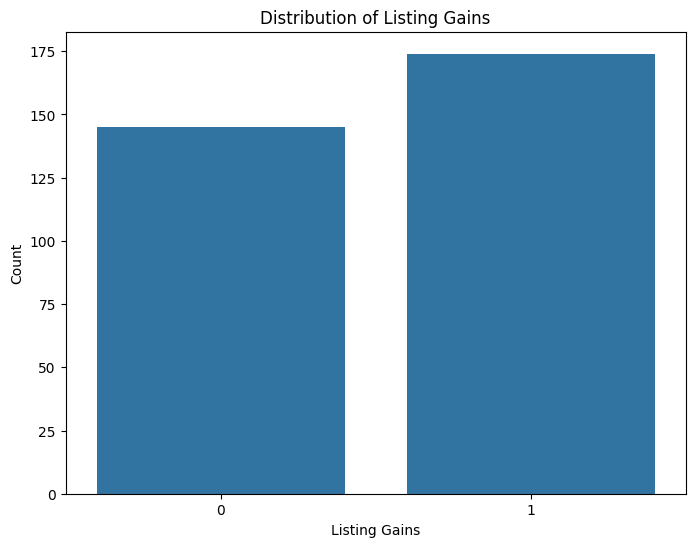

In [11]:
# check the ditrsibution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x = 'Listing_Gains_Profit', data = df)
plt.title('Distribution of Listing Gains')
plt.xlabel('Listing Gains')
plt.ylabel('Count')
plt.show()

The countplot shows a slightly higher number of IPOs listed as a profit compared to no profit

**Visualization 2: Boxplots for continuous variable to check for outliers**

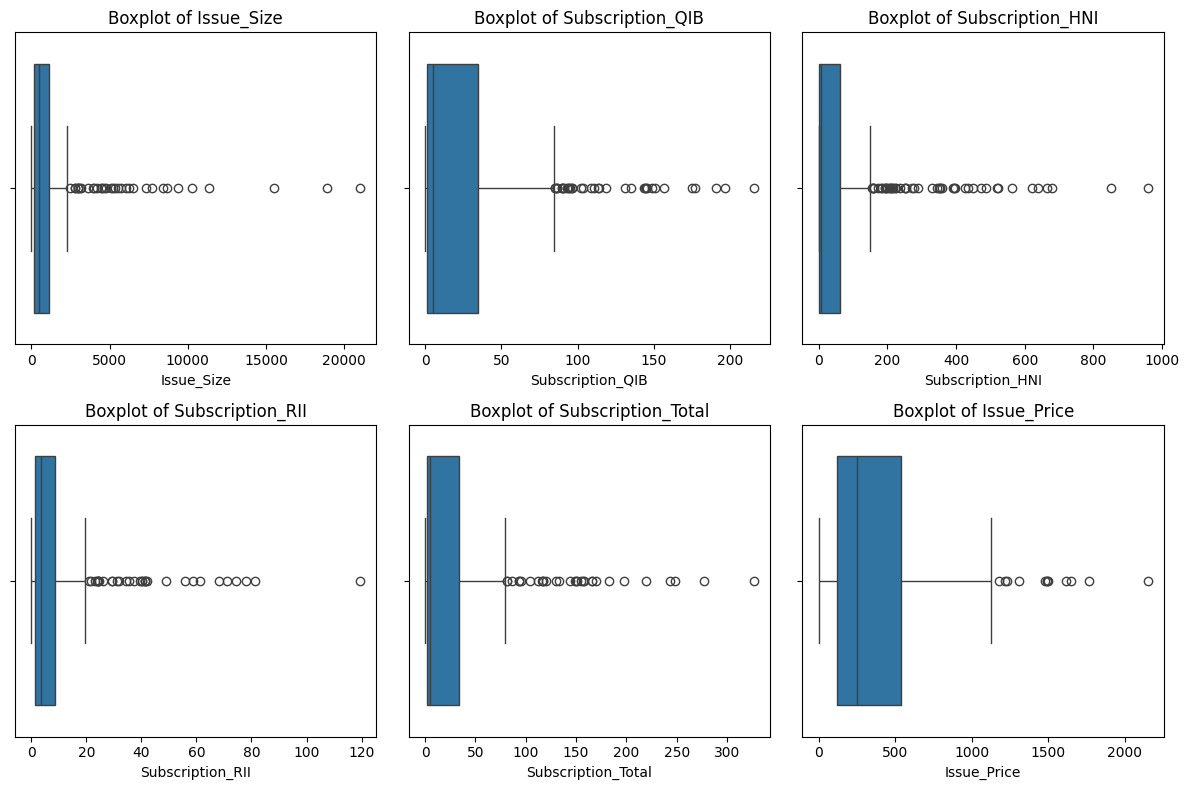

In [12]:
# List of continuous variables
continuous_variables = ['Issue_Size' , 'Subscription_QIB', 'Subscription_HNI', 'Subscription_RII' , 'Subscription_Total', 'Issue_Price']

# Define the size of the subplot grid
num_rows = 2
num_cols = 3

# Create a new figure
plt.figure(figsize=(12,8))

# Loop through each continuous variable and create a boxplot
for i, variable in enumerate(continuous_variables, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=variable, data=df)
    plt.title(f'Boxplot of {variable}')
    plt.xlabel(variable)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()



We can see many outliers in here


**Visualization 3: Relationship between predictor variables and target variable**

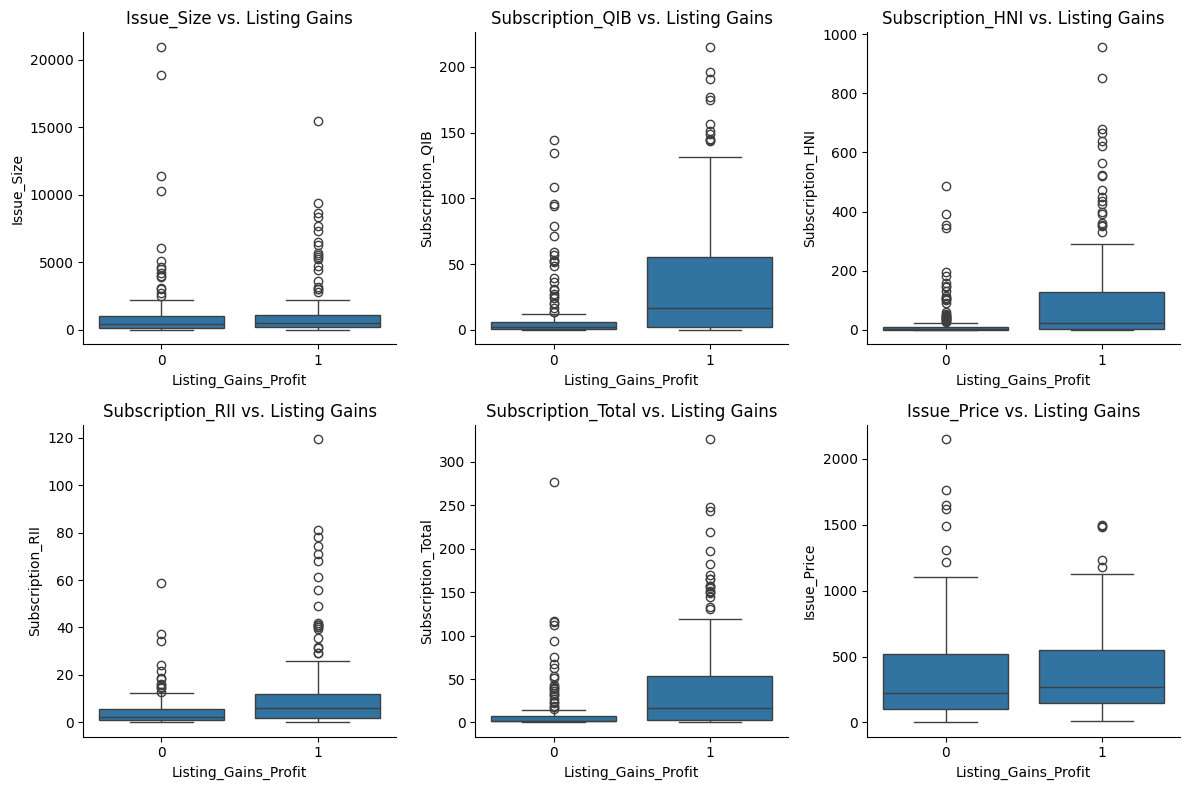

In [13]:
# List of predictor variables
predictor_variables = ['Issue_Size' , 'Subscription_QIB', 'Subscription_HNI', 'Subscription_RII' , 'Subscription_Total', 'Issue_Price']

# Define the size of the subplot grid
num_rows = 2
num_cols = 3

plt.figure(figsize=(12,8))

# Loop through each predictor variable and create a boxplot
for i, var in enumerate(predictor_variables, start = 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x = 'Listing_Gains_Profit', y = var, data = df)
    plt.title(f'{var} vs. Listing Gains')

# Adjust layout and display the plot
sns.despine()
plt.tight_layout()
plt.show()

Almost all of the predictor variables seems to have a seems to have a strong relationship with the target as we clearly see a higher median for profit cases.

**Visualization 4: Check if there are correlations between predictor variables**

In [14]:
df.dtypes

,0
Date,object
IPOName,object
Issue_Size,float64
Subscription_QIB,float64
Subscription_HNI,float64
Subscription_RII,float64
Subscription_Total,float64
Issue_Price,int64
Listing_Gains_Percent,float64
Listing_Gains_Profit,int64


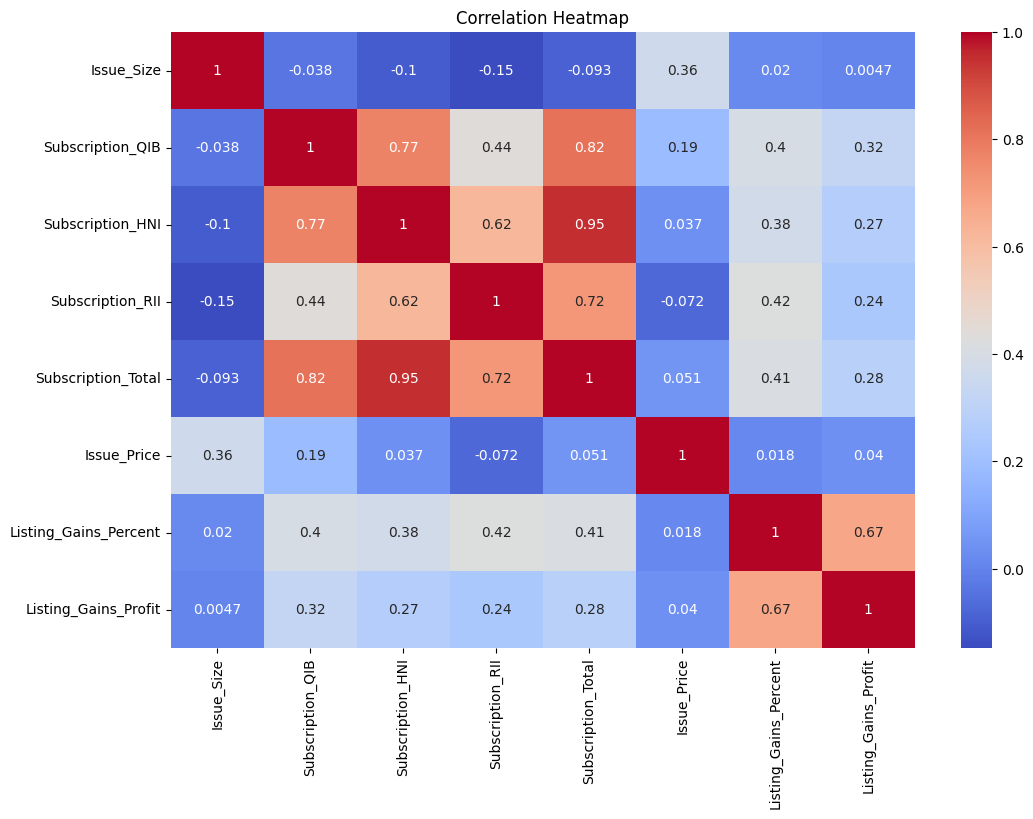

In [16]:
#check correlation using heatmap
numerical_var = df[['Issue_Size', 'Subscription_QIB', 'Subscription_HNI', 'Subscription_RII', 'Subscription_Total', 'Issue_Price', 'Listing_Gains_Percent', 'Listing_Gains_Profit']]
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_var.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



**Strong Positive Correlations:**


*   There is notable strong positive correlation (0.95) between '**Subscription_Total**' and '**Subscription_HNI**', another strong positive correlation (0.82) betwwen '**Subscription_Total**' and '**Subscription_QBI**', and with positive correlation (0.72) between '**Subscription_Total**' and '**Subscription_RII**'.



**Moderate Positive Correlations:**


*   There is moderate positive correlation (0.67) between '**Listing_Gains_Percent**' and '**Listing_Gains_Profit**', another moderate positive correlations (0.62) between '**Subscription_RII**' and '**Subscription_HNI**', moderate positive correlations (0.44) between '**Subscription_RII**' and '**Subscription_QBI**'.






##**Outlier Treatment:**

In [32]:
numerical_variables = ['Issue_Size' , 'Subscription_QIB', 'Subscription_HNI', 'Subscription_RII' , 'Subscription_Total', 'Issue_Price']

# Calculate skewness for each numerical variable
skewness = df[numerical_variables].skew()

# Compute IQR for all numerical variables
Q1 = df[numerical_variables].quantile(0.25)
Q3 = df[numerical_variables].quantile(0.75)
IQR = Q3 - Q1


In [33]:
for var in numerical_variables:
    lower_bound = Q1[var] - 1.5 * IQR[var]
    upper_bound = Q3[var] + 1.5 * IQR[var]

    num_lower = (df[var] < lower_bound).sum()
    num_upper = (df[var] > upper_bound).sum()

    print(f'{var}: {num_lower} values below lower bound, {num_upper} above upper bound')

    df[var] = df[var].clip(lower=lower_bound, upper=upper_bound)

Issue_Size: 0 values below lower bound, 0 above upper bound
Subscription_QIB: 0 values below lower bound, 0 above upper bound
Subscription_HNI: 0 values below lower bound, 0 above upper bound
Subscription_RII: 0 values below lower bound, 0 above upper bound
Subscription_Total: 0 values below lower bound, 0 above upper bound
Issue_Price: 0 values below lower bound, 0 above upper bound


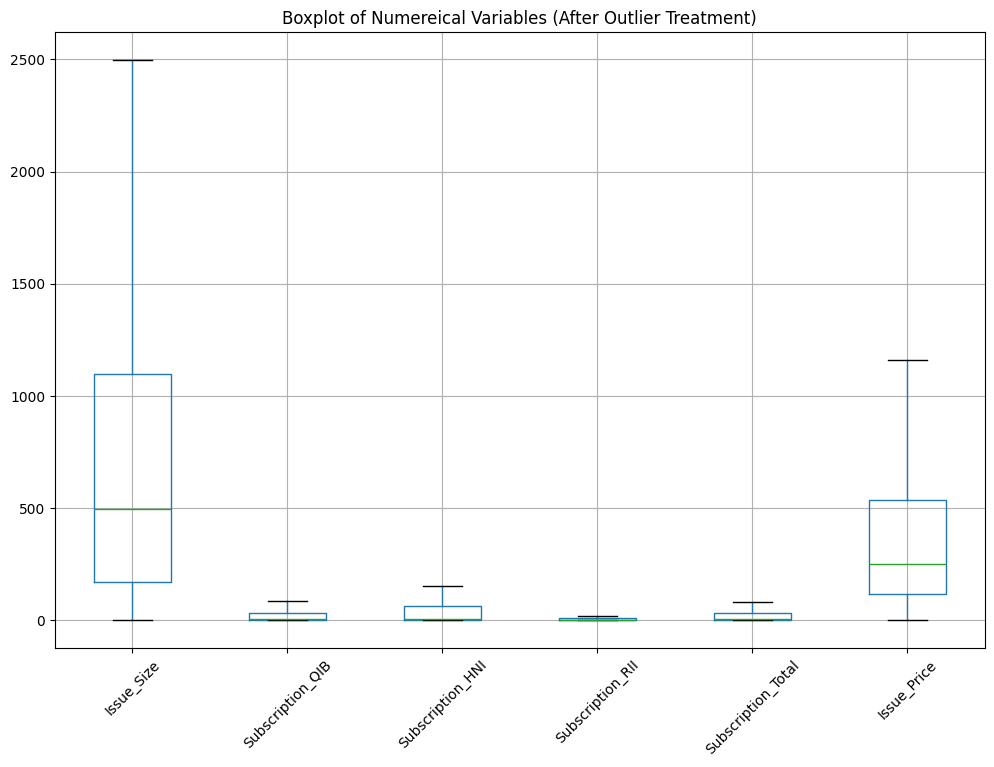

In [34]:
#visualizing
plt.figure(figsize=(12,8))
df[numerical_variables].boxplot()
plt.title('Boxplot of Numereical Variables (After Outlier Treatment)')
plt.xticks(rotation=45)
plt.show()

In [35]:
print('Summary Statistics (After Outlier Treatment): \n', df[numerical_variables].describe())

Summary Statistics (After Outlier Treatment): 
         Issue_Size  Subscription_QIB  Subscription_HNI  Subscription_RII  \
count   319.000000        319.000000        319.000000        319.000000   
mean    763.561238         21.521183         40.356426          6.060940   
std     769.689122         29.104549         57.427921          6.176882   
min       0.000000          0.000000          0.000000          0.000000   
25%     169.005000          1.150000          1.255000          1.275000   
50%     496.250000          4.940000          5.070000          3.420000   
75%    1100.000000         34.635000         62.095000          8.605000   
max    2496.492500         84.862500        153.355000         19.600000   

       Subscription_Total  Issue_Price  
count          319.000000   319.000000  
mean            20.456646   362.147335  
std             27.217740   312.272967  
min              0.000000     0.000000  
25%              1.645000   119.000000  
50%              4.93

**Observation:**

*   following the boxplot and summary statistics we can confimr that there are no outliers left also we can see relatively small standard deviation which indicate uniformity.





##**Setting the Target and Predictor Variables:**

**Create Arrays of Target and Predictor Variables**

In [38]:
# Array of the target variable (dependent variable)
target_variable = df['Listing_Gains_Profit'].values

# Array of the predictor variables (independent variables)
predictor_variable = df.drop(columns=['Listing_Gains_Profit', 'IPOName', 'Date '], axis=1).values

**Perform Normalization on Predictor Variables**

In [39]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Perform normalization on predictor variables
predictor_variables_normalized = scaler.fit_transform(predictor_variable)

**Summary Statistics after Normalization**

In [40]:
# Convert normalized predictor variable array back to DataFrame for summary statistics
df_normalized = pd.DataFrame(predictor_variables_normalized, columns = df.columns[2:-1])

# Summary statistics for normalized predictor variables
print('Summary Statistics (After Normalization):')
print(df_normalized.describe())

Summary Statistics (After Normalization):
       Issue_Size  Subscription_QIB  Subscription_HNI  Subscription_RII  \
count  319.000000        319.000000        319.000000        319.000000   
mean     0.305854          0.253601          0.263157          0.309232   
std      0.308308          0.342961          0.374477          0.315147   
min      0.000000          0.000000          0.000000          0.000000   
25%      0.067697          0.013551          0.008184          0.065051   
50%      0.198779          0.058212          0.033061          0.174490   
75%      0.440618          0.408131          0.404910          0.439031   
max      1.000000          1.000000          1.000000          1.000000   

       Subscription_Total  Issue_Price  Listing_Gains_Percent  
count          319.000000   319.000000             319.000000  
mean             0.252489     0.311793               0.277221  
std              0.335939     0.268853               0.129645  
min              0.000000 

from the summary statistics we can see the min and mix values for all the variables are 0 and 1, which confirms the nomralization was successful.

##**Creating the Holdout Validation Approach**

In [41]:
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictor_variable, target_variable, test_size=0.2, random_state=666)

In [42]:
# Display shapes of Training and Testing sets
print('Shape of Training set: ',X_train.shape, y_train.shape)
print('Shape of Testing set: ',X_test.shape, y_test.shape)

Shape of Training set:  (255, 7) (255,)
Shape of Testing set:  (64, 7) (64,)


##**Define the Deep Learning Classification Model**

In [43]:
#instantiate a model with keras sequantial api
model = tf.keras.Sequential(name="sequential")

model.add(tf.keras.layers.Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

##**Compiling and Training the Model**

In [44]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer=optimizer)

In [45]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

##**Model Evaluation**

In [49]:
model.fit(X_train, y_train, epochs=50, verbose=0)
print(model.evaluate(X_train, y_train))




8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9251 - loss: 0.1895 
[0.18377120792865753, 0.9333333373069763]


In [50]:
print(model.evaluate(X_test, y_test))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.8542 - loss: 0.8603
[0.6976857781410217, 0.859375]


Compare the training and testing accuracies. If the training accuracy is significantly higher than than the testing accuracy, it might indicate Overfitting which we are facing in this case as we can see the training accuracy exceeds by 7% which might indicate mild overfitting

##**Adding more hidden layer to avoid Overfitting**

In [52]:
model_2 = Sequential()

model_2.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

model_2.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_2.add(Dropout(0.2))
model_2.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model_2.fit(X_train, y_train, epochs=50, verbose=0)


In [53]:
# Evaluate the second model on train dataset
train_loss_2, train_accuracy_2 = model_2.evaluate(X_train, y_train)
print('Train Loss(Model 2): ',train_loss_2)
print('Train Accuracy(Model 2): ',train_accuracy_2)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9574 - loss: 0.5445  
Train Loss(Model 2):  0.5488333702087402
Train Accuracy(Model 2):  0.9607843160629272


In [54]:
# Evaluate the model on train dataset
test_loss_2, test_accuracy_2 = model_2.evaluate(X_test, y_test, verbose=0)
print('Test Loss(Model 2): ',test_loss_2)
print('Test Accuracy(Model 2): ',test_accuracy_2)

Test Loss(Model 2):  0.7087894678115845
Test Accuracy(Model 2):  0.890625


#**Conclusion:**



*   **Training Accuracy of model 1 : 93.33%**

*   **Testing Accuracy of model 1 : 85.93%**

Which is okay but might indicate mild overfitting.

To avoid this I have added more hidden layers and trained model 2,


*   **Training Accuracy of model 2 : 96%**
*   **Testing Accuracy of model 2 : 89%**

Turns out it might still overfit but **testing accuracy in model 2 increased by 3.07%**




In [ ]:

predictor_variables = ['Issue_Size' , 'Subscription_QIB', 'Subscription_HNI', 'Subscription_RII' , 'Subscription_Total', 'Issue_Price']

# Define the size of the subplot grid
num_rows = 2
num_cols = 3

plt.figure(figsize=(12,8))

# Loop through each predictor variable and create a boxplot
for i, var in enumerate(predictor_variables, start = 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x = 'Listing_Gains_Profit', y = var, data = df)
    plt.title(f'{var} vs. Listing Gains')

# Adjust layout and display the plot
sns.despine()
plt.tight_layout()
plt.show()# List of predictor variables
predictor_variables = ['Issue_Size' , 'Subscription_QIB', 'Subscription_HNI', 'Subscription_RII' , 'Subscription_Total', 'Issue_Price']

# Define the size of the subplot grid
num_rows = 2
num_cols = 3

plt.figure(figsize=(12,8))

# Loop through each predictor variable and create a boxplot
for i, var in enumerate(predictor_variables, start = 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x = 'Listing_Gains_Profit', y = var, data = df)
    plt.title(f'{var} vs. Listing Gains')

